Importing the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
import pandas as pd
from keras.datasets import mnist

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/MyDrive/42028/Assignment1/

/content/gdrive/MyDrive/42028/Assignment1


#1-Uploading and storing the Data

In [5]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels
    
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028/Assignment1', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028/Assignment1', kind='t10k')

#2-Data set Basic information

Train Data Shape (60000, 784) Type-> <class 'numpy.ndarray'>
Train Labels Shape   (60000,) Type-> <class 'numpy.ndarray'>
Test Data Shape (10000, 784) Type-> <class 'numpy.ndarray'>
Test Labels Shape   (10000,) Type-> <class 'numpy.ndarray'>


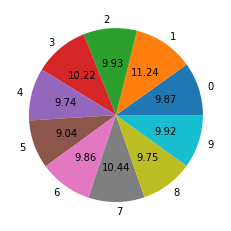

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


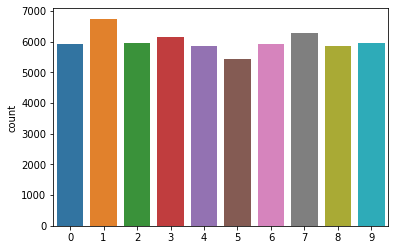

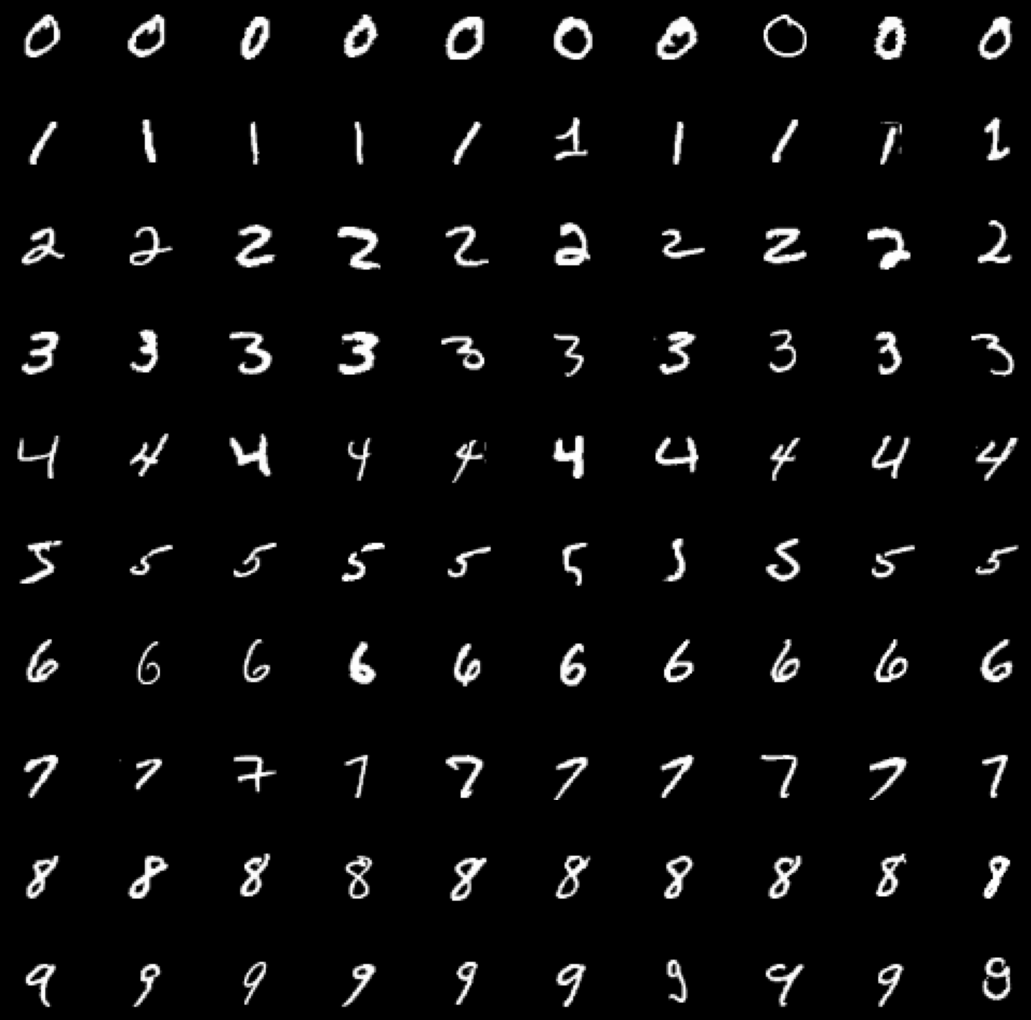

In [6]:
def shape_type(X,y,type_data):
  print(type_data,"Data Shape",X.shape,"Type->",type (X))
  print(type_data,"Labels Shape  ",y.shape,"Type->",type (y))

shape_type(X_train,y_train,"Train")
shape_type(X_test,y_test,"Test")
import numpy as np

#Distribution of the labels
(unique, frequency)=np.unique(y_train,return_counts=True)
plt.pie(frequency,labels=unique,autopct='%.2f')
plt.show()
sns.countplot(y_train)
plt.show()

#Showing 10 images of each digit
amount = 10
CLASSES= [0,1,2,3,4,5,6,7,8,9]
fig, axes = plt.subplots(len(CLASSES), amount, figsize=(15,15), facecolor='black')
fig.tight_layout(pad=2)
for i, CLASS in enumerate(CLASSES):
    class_images_pixels = X_train[y_train==CLASS]
    class_images_pixels=class_images_pixels[0:amount]
    fig.tight_layout(pad=2)
    for j, class_image in enumerate(class_images_pixels):
        axes[i, j].imshow(np.reshape(class_image,[28,28]), cmap="gray")
        axes[i, j].set(xticks=[], yticks=[])
plt.show()

#3-Normalizing the Data  for raw input

In [7]:
X_train_normal=np.round( X_train/255.0,3)
X_test_normal=np.round( X_test/255.0,3)

#4-ANN with Normalized raw data

In [8]:
import tensorflow as tf
model= tf.keras.models.Sequential( [ tf.keras.Input(shape=784),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile( optimizer=tf.optimizers.SGD(learning_rate=0.1 )  , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit( np.reshape(X_train_normal,[-1,784]), np.reshape(y_train,[-1,1]), epochs=10, batch_size=32)

accuracy=model.evaluate( np.reshape(X_test_normal,[-1,784]), np.reshape(y_test,[-1,1]))
print("Accuracy of the model using raw data-",accuracy[1])
prediction=model.predict_classes(X_test_normal)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4573 - accuracy: 0.8711
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1459 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0500 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0411 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0317 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9932
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0645 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#5-Confusion Matrix of model with normalized raw data

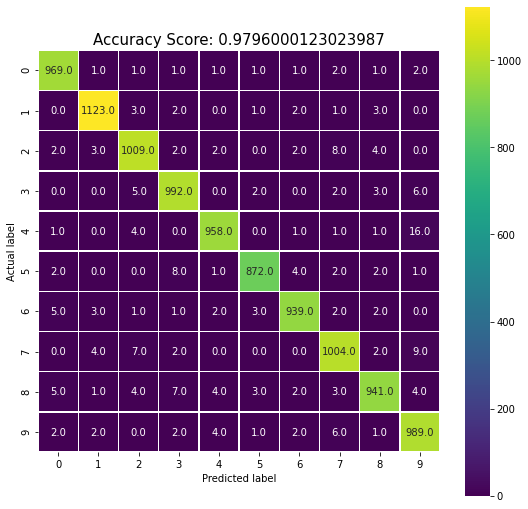

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix( y_test, prediction)
plt.figure( figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".1f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy[1] )
plt.title(all_sample_title, size = 15);

#6-Calculating the HOG features of the training and testing (pixel per cell=[2,2] cells per block=[2,2]

In [11]:
from skimage.feature import hog
def return_hog_features(X):
  """Input an array storing images
     returns a numpy array which stores hog features of each image"""
  X = np.array(X, dtype ="int16")
  list_hog = []
  for feature in X:
    fd = hog(feature.reshape((28,28)), orientations=9, pixels_per_cell=(2,2),cells_per_block=(2,2) )
    list_hog.append(fd)
  hog_features = np.array(list_hog, "float64")
  return hog_features
train_hog_features= return_hog_features(X_train)
test_hog_features= return_hog_features(X_test)

#7-Nueral Network fitting and predicting on HOG features

In [19]:
model_hog= tf.keras.models.Sequential( [ tf.keras.Input(shape= len(train_hog_features[0])),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),      
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model_hog.compile( optimizer=tf.optimizers.SGD(learning_rate=0.7)  , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_hog.fit( train_hog_features, y_train, epochs=10, batch_size=32)
accuracy_hog=model_hog.evaluate(test_hog_features,np.reshape(y_test,[-1,1]))
print("Accuracy of the model using hog data-",accuracy_hog[1])
prediction_hog=model_hog.predict_classes(test_hog_features)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1979 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 9.5443e-04 - accuracy: 0.9998
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 3.1293e-04 - accuracy: 1.0000
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.9858e-04 - accuracy: 1.0000
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6017e-04 - accuracy: 1.0000
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.4173e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
model_hog.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               1557760   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 1,560,330
Trainable params: 1,560,330
Non-trainable params: 0
_________________________________________________________________


#8-Confusion Matrix of model with HOG features

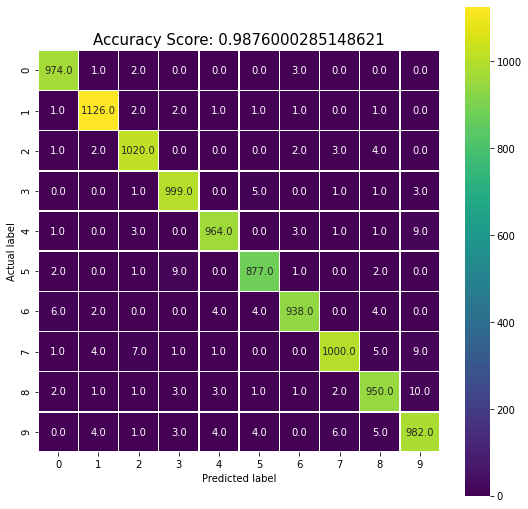

In [15]:
cm=confusion_matrix( y_test, prediction_hog)
plt.figure( figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".1f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_hog[1] )
plt.title(all_sample_title, size = 15);

#**EXPERIMENTS**





# Experiment 1-*Finding the Best HOG attributes*

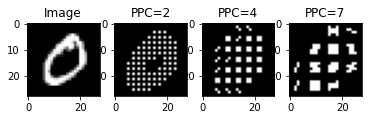

<Figure size 864x2160 with 0 Axes>

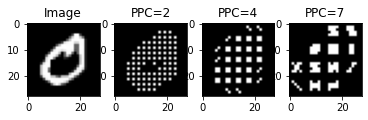

<Figure size 864x2160 with 0 Axes>

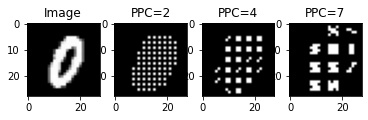

<Figure size 864x2160 with 0 Axes>

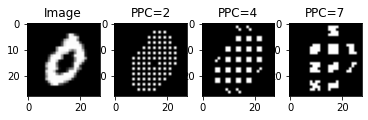

<Figure size 864x2160 with 0 Axes>

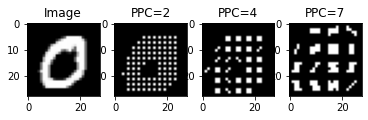

<Figure size 864x2160 with 0 Axes>

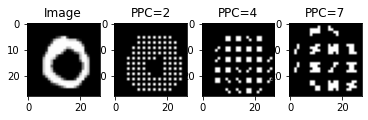

<Figure size 864x2160 with 0 Axes>

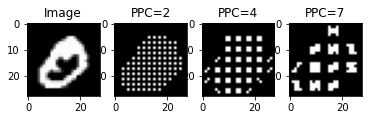

<Figure size 864x2160 with 0 Axes>

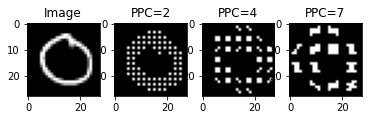

<Figure size 864x2160 with 0 Axes>

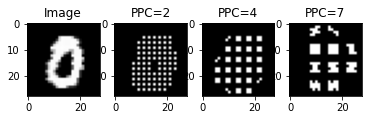

<Figure size 864x2160 with 0 Axes>

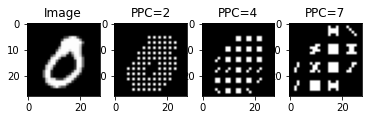

<Figure size 864x2160 with 0 Axes>

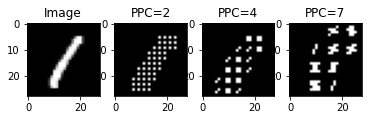

<Figure size 864x2160 with 0 Axes>

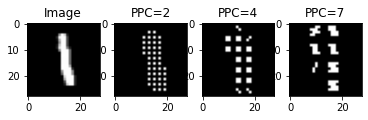

<Figure size 864x2160 with 0 Axes>

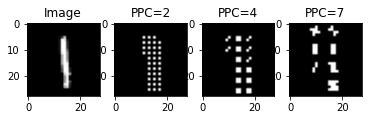

<Figure size 864x2160 with 0 Axes>

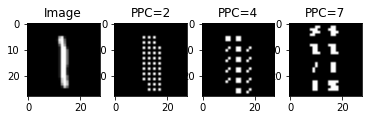

<Figure size 864x2160 with 0 Axes>

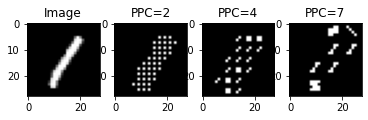

<Figure size 864x2160 with 0 Axes>

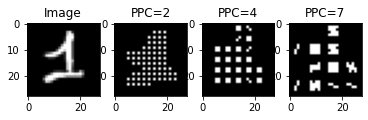

<Figure size 864x2160 with 0 Axes>

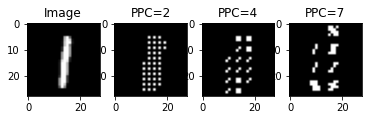

<Figure size 864x2160 with 0 Axes>

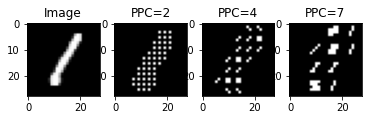

<Figure size 864x2160 with 0 Axes>

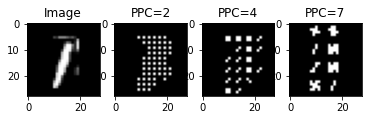

<Figure size 864x2160 with 0 Axes>

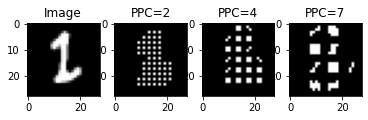

<Figure size 864x2160 with 0 Axes>

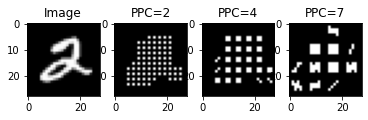

<Figure size 864x2160 with 0 Axes>

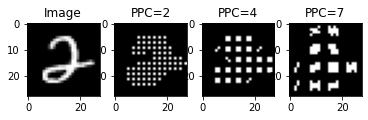

<Figure size 864x2160 with 0 Axes>

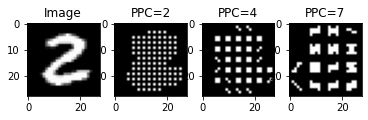

<Figure size 864x2160 with 0 Axes>

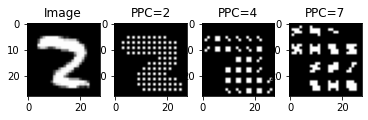

<Figure size 864x2160 with 0 Axes>

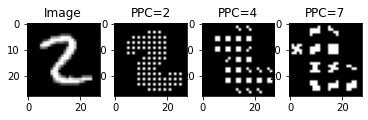

<Figure size 864x2160 with 0 Axes>

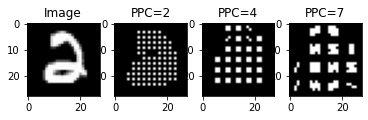

<Figure size 864x2160 with 0 Axes>

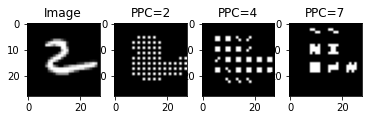

<Figure size 864x2160 with 0 Axes>

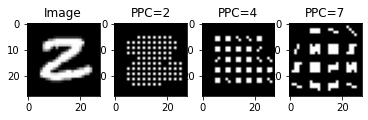

<Figure size 864x2160 with 0 Axes>

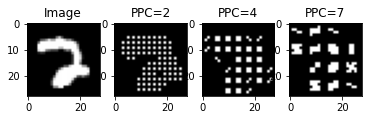

<Figure size 864x2160 with 0 Axes>

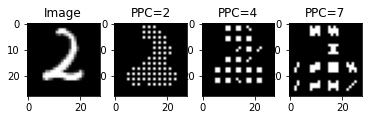

<Figure size 864x2160 with 0 Axes>

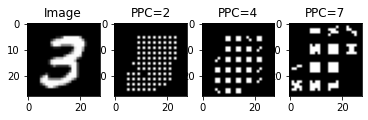

<Figure size 864x2160 with 0 Axes>

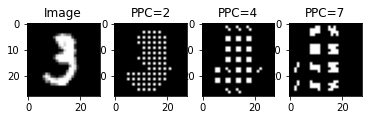

<Figure size 864x2160 with 0 Axes>

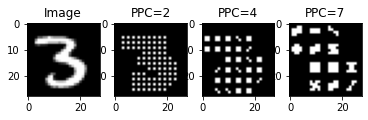

<Figure size 864x2160 with 0 Axes>

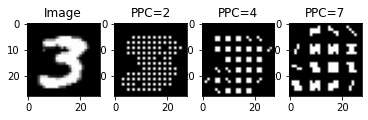

<Figure size 864x2160 with 0 Axes>

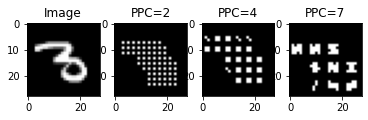

<Figure size 864x2160 with 0 Axes>

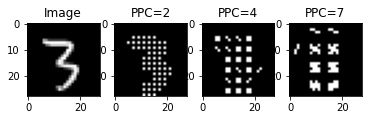

<Figure size 864x2160 with 0 Axes>

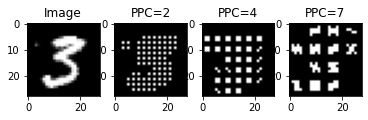

<Figure size 864x2160 with 0 Axes>

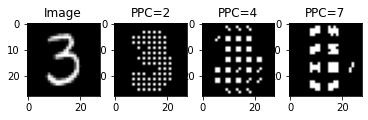

<Figure size 864x2160 with 0 Axes>

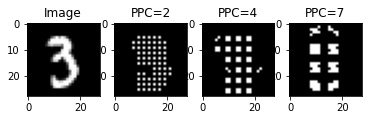

<Figure size 864x2160 with 0 Axes>

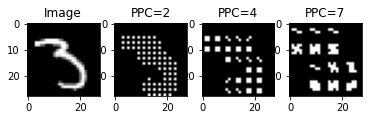

<Figure size 864x2160 with 0 Axes>

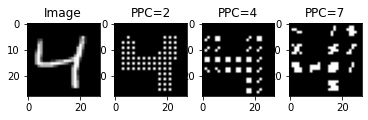

<Figure size 864x2160 with 0 Axes>

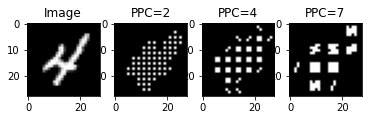

<Figure size 864x2160 with 0 Axes>

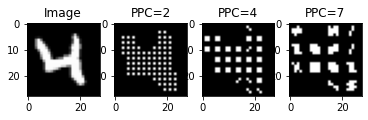

<Figure size 864x2160 with 0 Axes>

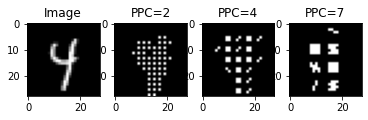

<Figure size 864x2160 with 0 Axes>

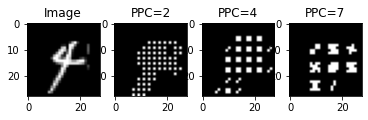

<Figure size 864x2160 with 0 Axes>

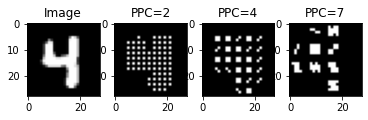

<Figure size 864x2160 with 0 Axes>

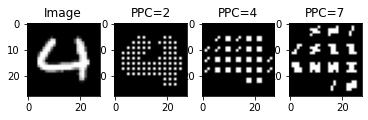

<Figure size 864x2160 with 0 Axes>

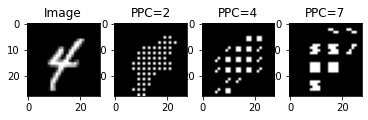

<Figure size 864x2160 with 0 Axes>

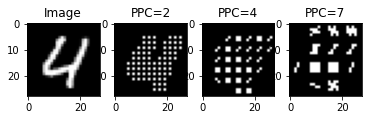

<Figure size 864x2160 with 0 Axes>

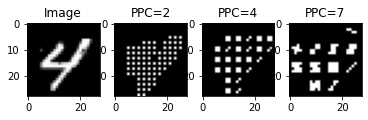

<Figure size 864x2160 with 0 Axes>

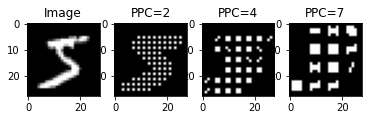

<Figure size 864x2160 with 0 Axes>

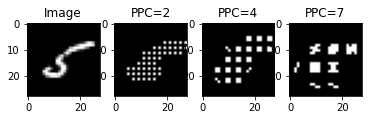

<Figure size 864x2160 with 0 Axes>

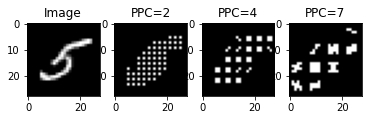

<Figure size 864x2160 with 0 Axes>

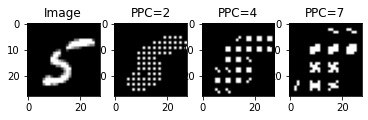

<Figure size 864x2160 with 0 Axes>

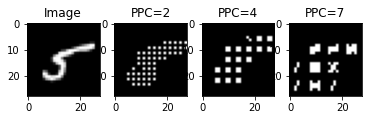

<Figure size 864x2160 with 0 Axes>

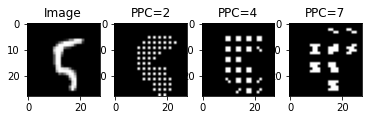

<Figure size 864x2160 with 0 Axes>

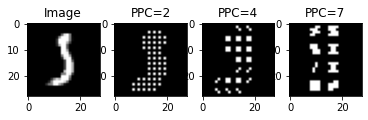

<Figure size 864x2160 with 0 Axes>

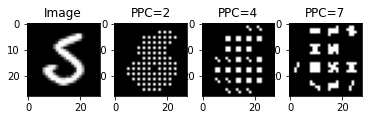

<Figure size 864x2160 with 0 Axes>

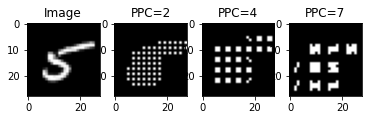

<Figure size 864x2160 with 0 Axes>

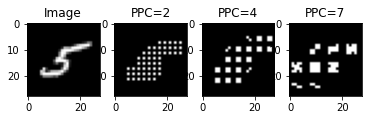

<Figure size 864x2160 with 0 Axes>

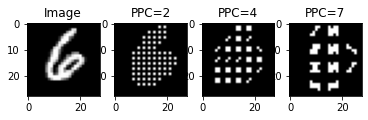

<Figure size 864x2160 with 0 Axes>

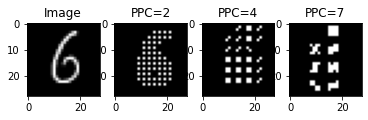

<Figure size 864x2160 with 0 Axes>

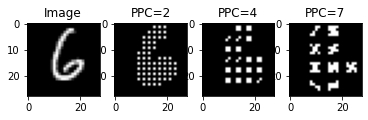

<Figure size 864x2160 with 0 Axes>

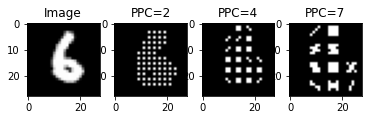

<Figure size 864x2160 with 0 Axes>

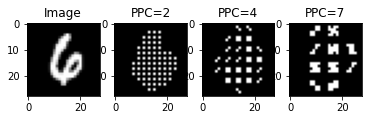

<Figure size 864x2160 with 0 Axes>

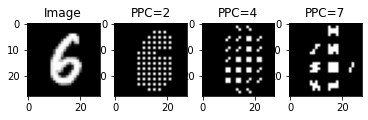

<Figure size 864x2160 with 0 Axes>

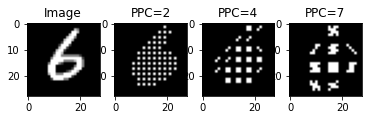

<Figure size 864x2160 with 0 Axes>

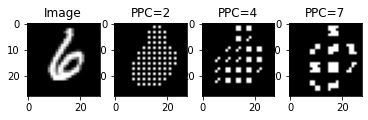

<Figure size 864x2160 with 0 Axes>

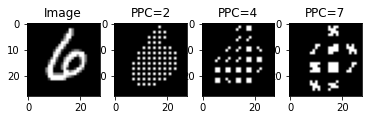

<Figure size 864x2160 with 0 Axes>

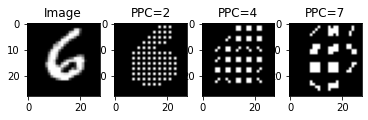

<Figure size 864x2160 with 0 Axes>

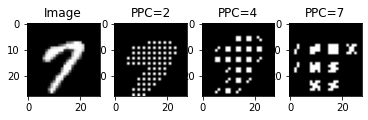

<Figure size 864x2160 with 0 Axes>

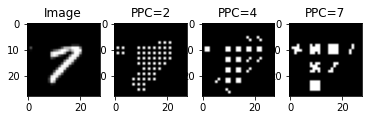

<Figure size 864x2160 with 0 Axes>

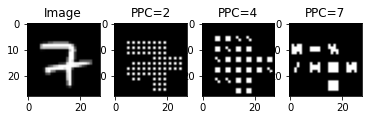

<Figure size 864x2160 with 0 Axes>

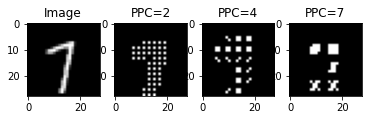

<Figure size 864x2160 with 0 Axes>

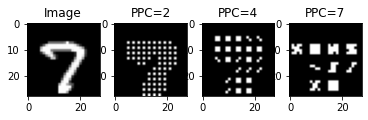

<Figure size 864x2160 with 0 Axes>

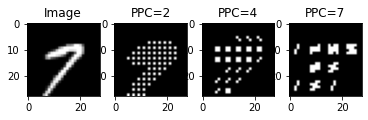

<Figure size 864x2160 with 0 Axes>

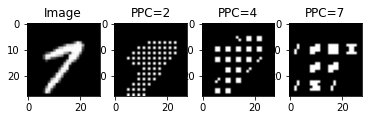

<Figure size 864x2160 with 0 Axes>

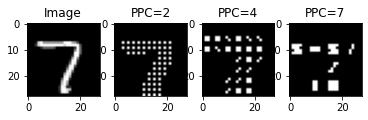

<Figure size 864x2160 with 0 Axes>

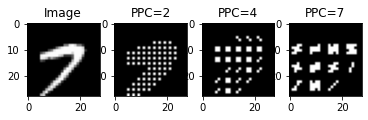

<Figure size 864x2160 with 0 Axes>

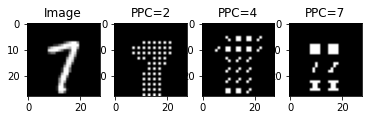

<Figure size 864x2160 with 0 Axes>

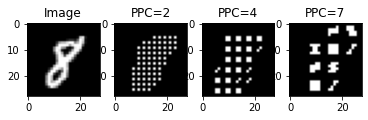

<Figure size 864x2160 with 0 Axes>

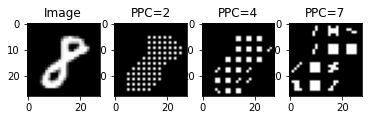

<Figure size 864x2160 with 0 Axes>

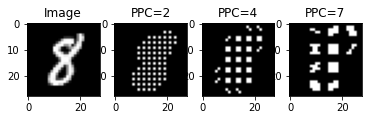

<Figure size 864x2160 with 0 Axes>

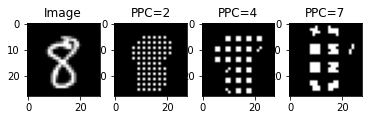

<Figure size 864x2160 with 0 Axes>

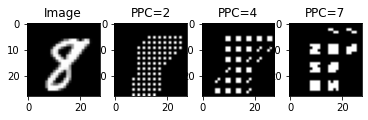

<Figure size 864x2160 with 0 Axes>

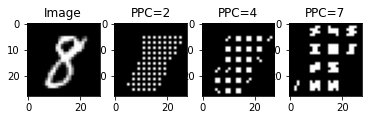

<Figure size 864x2160 with 0 Axes>

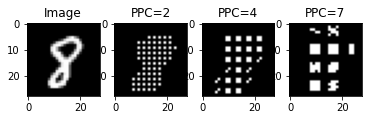

<Figure size 864x2160 with 0 Axes>

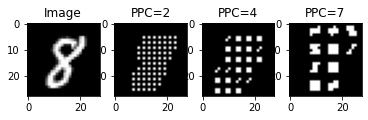

<Figure size 864x2160 with 0 Axes>

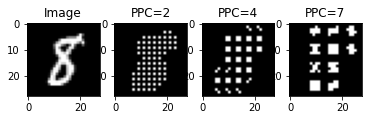

<Figure size 864x2160 with 0 Axes>

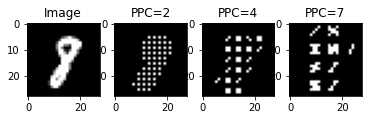

<Figure size 864x2160 with 0 Axes>

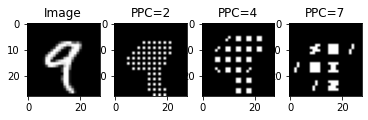

<Figure size 864x2160 with 0 Axes>

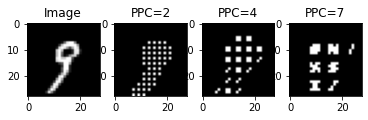

<Figure size 864x2160 with 0 Axes>

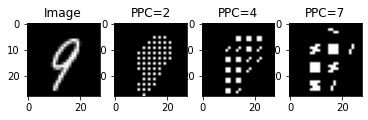

<Figure size 864x2160 with 0 Axes>

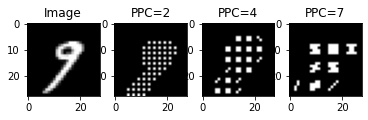

<Figure size 864x2160 with 0 Axes>

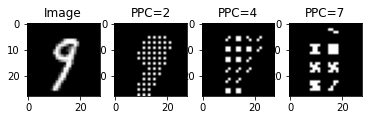

<Figure size 864x2160 with 0 Axes>

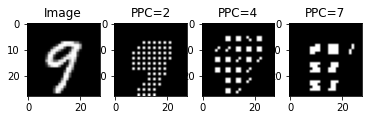

<Figure size 864x2160 with 0 Axes>

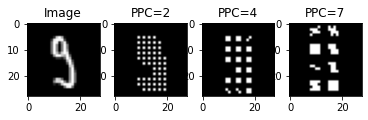

<Figure size 864x2160 with 0 Axes>

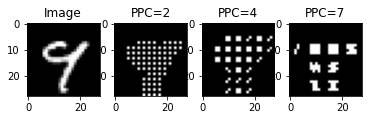

<Figure size 864x2160 with 0 Axes>

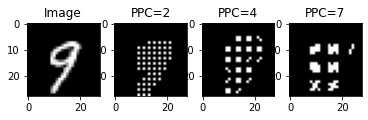

<Figure size 864x2160 with 0 Axes>

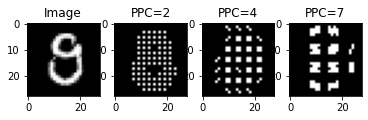

<Figure size 864x2160 with 0 Axes>

In [16]:
from skimage import exposure, color
def image_vs_hog(X,ppc):
  """Function takes input as an image and pixel per cell parameter
     Output is the image of the image with different pixel per cell value"""
  j=4
  fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
  image=np.reshape(X,[28,28])

  plt.figure(figsize=(12,30))
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.title.set_text("Image")

  fd, hog_image= hog(image, orientations=8, pixels_per_cell=(ppc[0],ppc[0]),cells_per_block=(j,j),visualize=True)
  hog_image_rescale=exposure.rescale_intensity(hog_image, in_range=(0,0.02))
  ax2.imshow(hog_image_rescale, cmap=plt.cm.gray)
  ax2.title.set_text( "PPC="+str (ppc[0]) )

  fd, hog_image= hog(image, orientations=8, pixels_per_cell=(ppc[1],ppc[1]),cells_per_block=(j,j),visualize=True)
  hog_image_rescale2=exposure.rescale_intensity(hog_image, in_range=(0,0.02))
  ax3.imshow(hog_image_rescale2, cmap=plt.cm.gray)
  ax3.title.set_text( "PPC="+str (ppc[1]) )


  fd, hog_image= hog(image, orientations=8, pixels_per_cell=(ppc[2],ppc[2]),cells_per_block=(j,j),visualize=True)
  hog_image_rescale2=exposure.rescale_intensity(hog_image, in_range=(0,0.02))
  ax4.imshow(hog_image_rescale2, cmap=plt.cm.gray)
  ax4.title.set_text( "PPC="+str (ppc[2]) )

  plt.show()

  
def label_hog_image(label,number):
  check=0
  for i in range(len(X_train)):
    if (y_train[i]==label):
      image_vs_hog(X_train[i],[2,4,7])
      check+=1
      if check==number:
        break

difficult_numer=[9,4,5,3,2,8]
for i in range(10):
   label_hog_image(i,10)

#Experiment 2-Images misclassified by all the classifier


 32 images were found which were misclassified by all the classifier (ANN,SVM,KNN),printing these 32 image

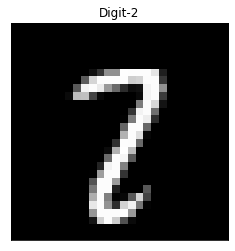

<Figure size 72x72 with 0 Axes>

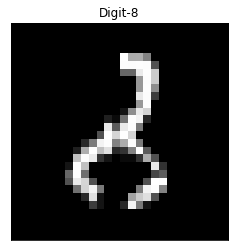

<Figure size 72x72 with 0 Axes>

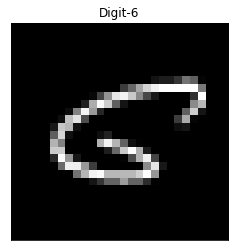

<Figure size 72x72 with 0 Axes>

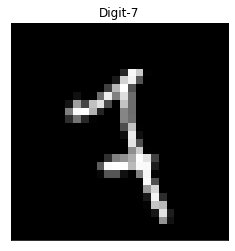

<Figure size 72x72 with 0 Axes>

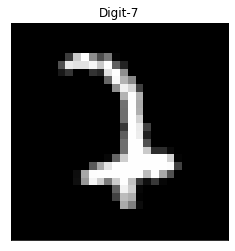

<Figure size 72x72 with 0 Axes>

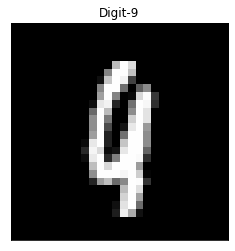

<Figure size 72x72 with 0 Axes>

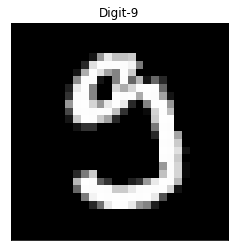

<Figure size 72x72 with 0 Axes>

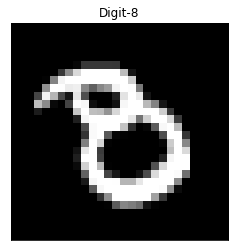

<Figure size 72x72 with 0 Axes>

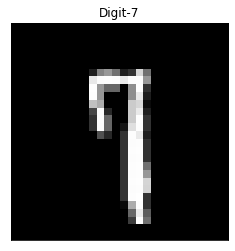

<Figure size 72x72 with 0 Axes>

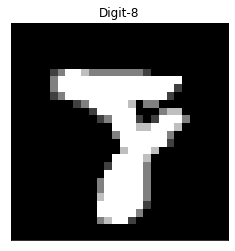

<Figure size 72x72 with 0 Axes>

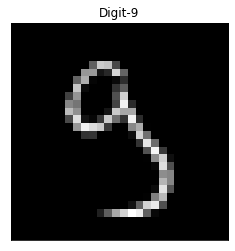

<Figure size 72x72 with 0 Axes>

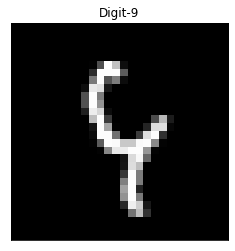

<Figure size 72x72 with 0 Axes>

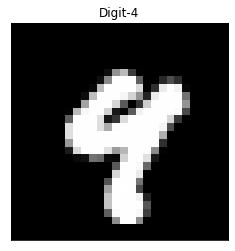

<Figure size 72x72 with 0 Axes>

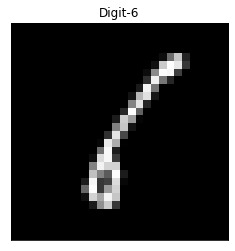

<Figure size 72x72 with 0 Axes>

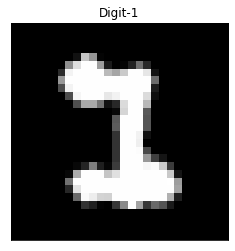

<Figure size 72x72 with 0 Axes>

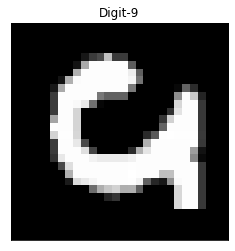

<Figure size 72x72 with 0 Axes>

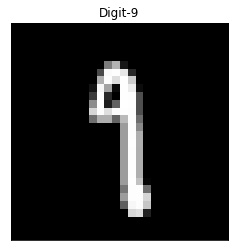

<Figure size 72x72 with 0 Axes>

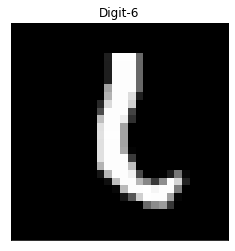

<Figure size 72x72 with 0 Axes>

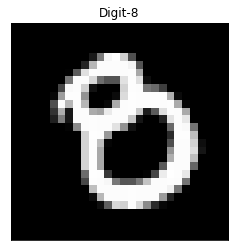

<Figure size 72x72 with 0 Axes>

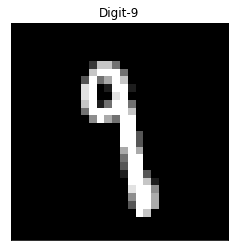

<Figure size 72x72 with 0 Axes>

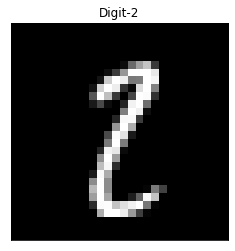

<Figure size 72x72 with 0 Axes>

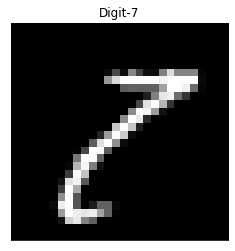

<Figure size 72x72 with 0 Axes>

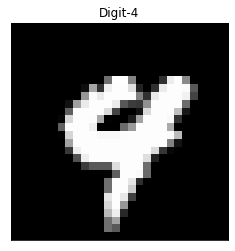

<Figure size 72x72 with 0 Axes>

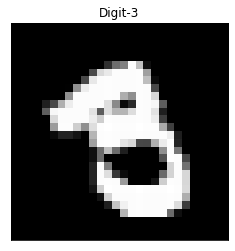

<Figure size 72x72 with 0 Axes>

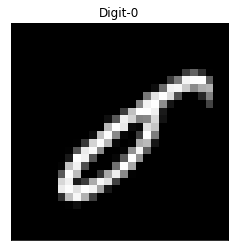

<Figure size 72x72 with 0 Axes>

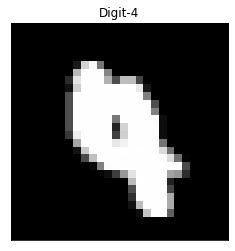

<Figure size 72x72 with 0 Axes>

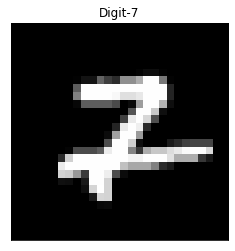

<Figure size 72x72 with 0 Axes>

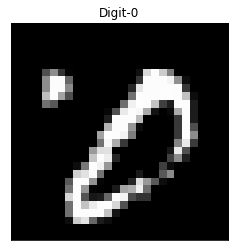

<Figure size 72x72 with 0 Axes>

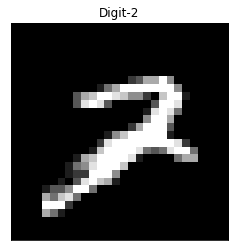

<Figure size 72x72 with 0 Axes>

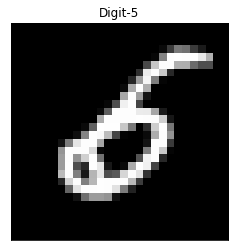

<Figure size 72x72 with 0 Axes>

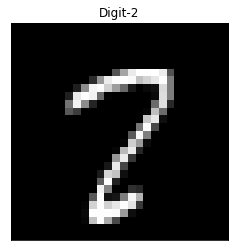

<Figure size 72x72 with 0 Axes>

In [17]:
wrong_image=[321,582,1014,1039,1226,1232,1247,1319,1522,1530,1709,1901,2130,2135,2182,2293,2387,2654,2896,3503,3796,3808,4860,5955,6651,8527,9015,9634,9664,9729,9839]
for i in wrong_image:
  plt.imshow( np.reshape(X_test[i],[28,28]),cmap="gray")
  plt.title("Digit-"+ str (y_test[i]))
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  plt.figure(figsize=(1,1))
  plt.show()

#EXPERIMENT 3- Finding any corelation in the number of pixels in the digits and it distribution. (No corelation found)

Text(0.5, 0, 'Mean')

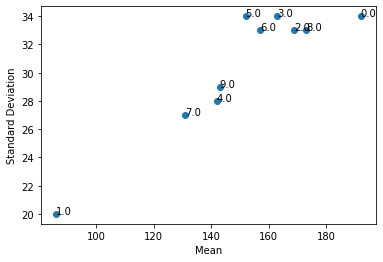

In [18]:
w, h = 3, 10
matrix = [[0 for x in range(w)] for y in range(h)]
for i in range(10):
  one= X_train[y_train==i]
  one_stats=[]
  for single_one in one:
    x=single_one[single_one!=0]
    one_stats.append(len(x))
  one_stats=np.array(one_stats)
  mean=np.mean(one_stats)
  std=np.std (one_stats)
  matrix[i][0]=i
  matrix[i][1]=mean
  matrix[i][2]=std
w, h = 3, 10
matrix = [[0 for x in range(w)] for y in range(h)]
for i in range(10):
  number= X_train[y_train==i]
  stats=[]
  for single in number:
    x=single[single!=0]
    stats.append(len(x))
    
  stats=np.array(stats)
  mean=np.mean(stats)
  std=np.std (stats)
  matrix[i][0]=i
  matrix[i][1]=mean
  matrix[i][2]=std

matrix= np.round(matrix)  
x=matrix[:,1]
y=matrix[:,2]
label=str (matrix[:,0])

plt.show()
n = matrix[:,0]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.ylabel( "Standard Deviation")
plt.xlabel( "Mean")

#Experiment 4- Error by both ANN

[0 1 2 3 4 5 6 7 8 9]
[1 1 3 2 6 8 7 9 8 9]


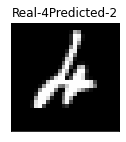

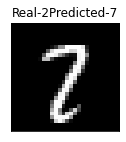

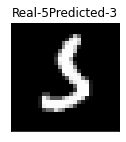

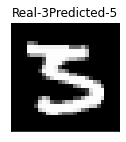

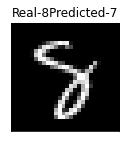

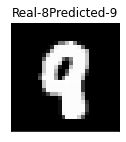

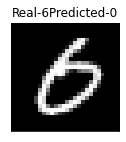

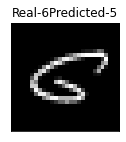

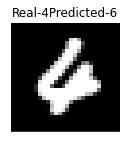

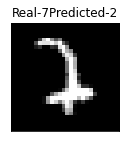

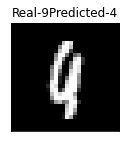

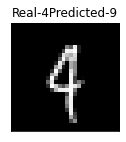

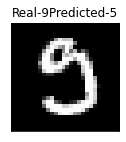

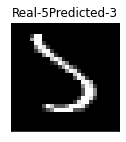

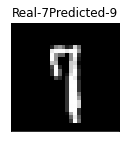

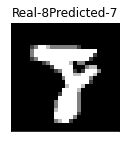

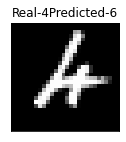

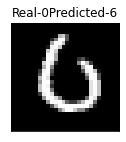

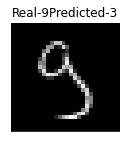

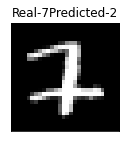

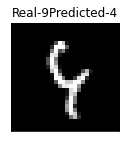

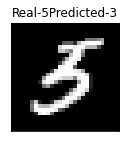

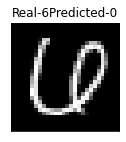

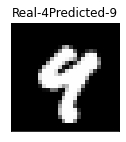

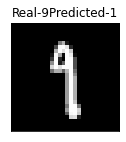

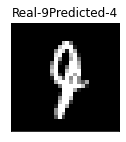

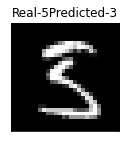

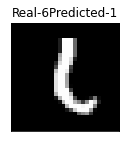

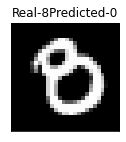

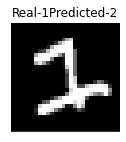

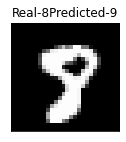

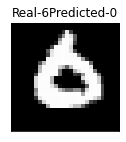

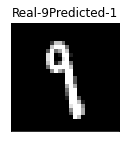

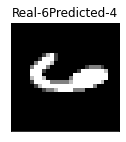

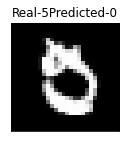

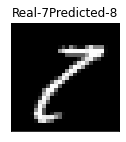

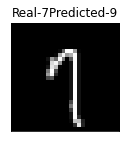

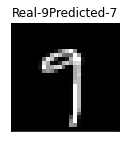

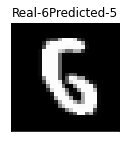

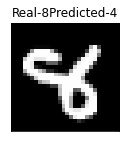

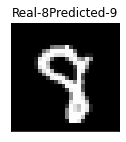

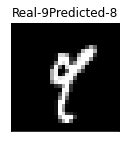

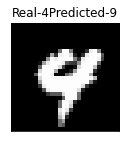

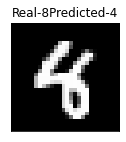

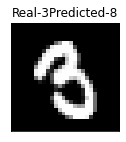

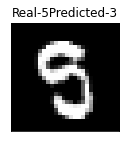

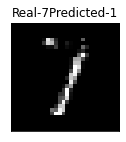

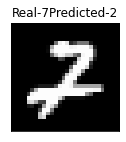

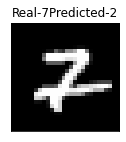

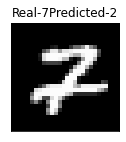

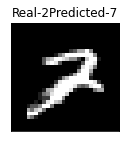

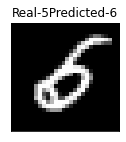

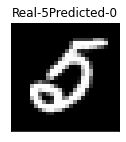

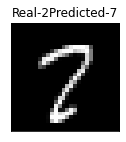

In [19]:
error_both=[]
for i in range(len(X_test)):
  if (prediction_hog[i]!=y_test[i]):
    if (prediction[i]==prediction_hog[i]):
      error_both.append(i)

(value,counts)=np.unique(y_test[error_both],return_counts=True)
print(value)
print(counts)

for i in error_both:
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(X_test[i],[28,28]), cmap="gray")
  plt.xticks(ticks=[])
  plt.yticks(ticks=[])
  title= "Real-"+str (y_test[i])+"Predicted-"+str (prediction_hog[i])
  plt.title(title)
  plt.show()

Generating cvs file which stores index at which there are classification error for further analysis

In [20]:
def build_error_csv(prediction,name):
  df= pd.DataFrame()
  error=[]  
  for i in range(len(prediction)):
    if (prediction[i]==y_test[i]):
      error.append(0)
    else:
      error.append(1)
  df[name]=error
  name=name+".csv"
  df.to_csv(name ,index=False)
build_error_csv(prediction,"ANN-Normalized")
build_error_csv(prediction_hog,"ANN-HOG")

Following is generated from excel which depicts the error% of each digit


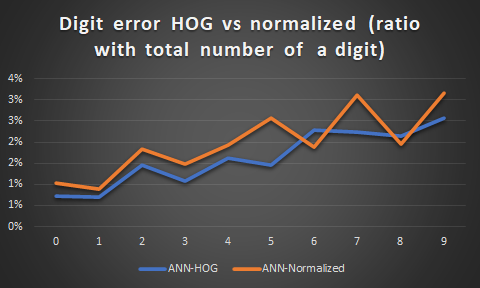

In [21]:
print("End of the Notebook!\nHope you enjoyed!")

End of the Notebook!
Hope you enjoyed!
